<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report
)
np.random.seed(42)

In [16]:
wine = load_wine()
X = wine.data
y = wine.target

print("Dataset Shape",X.shape)
print("Classes",list(wine.target_names))

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25,random_state=42,stratify=y
    )

Dataset Shape (178, 13)
Classes [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]


In [43]:
clf = Pipeline([
    ("scaler",StandardScaler()),
    ("knn",KNeighborsClassifier(n_neighbors=15, metric="minkowski",p=2))  # p=2 dile Euclidear and p=1 dile manhttan
])

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [44]:
print("Accuracy",float(accuracy_score(y_test,y_pred)))
print("\nConfusion Matrix",confusion_matrix(y_test,y_pred))
print("\nClassification Report",classification_report(y_test,y_pred))

Accuracy 1.0

Confusion Matrix [[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Model Evulation And optimization

In [46]:
from sklearn import pipeline
k_values = range(1,42)
accs = []

for k in k_values:
  model = Pipeline([
      ("scaler",StandardScaler()),
      ("knn",KNeighborsClassifier(n_neighbors=k))
  ])
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  accs.append(accuracy_score(y_test,pred))

In [47]:
print(accs)

[0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111, 0.9555555555555556, 0.9111111111111111, 0.9333333333333333]


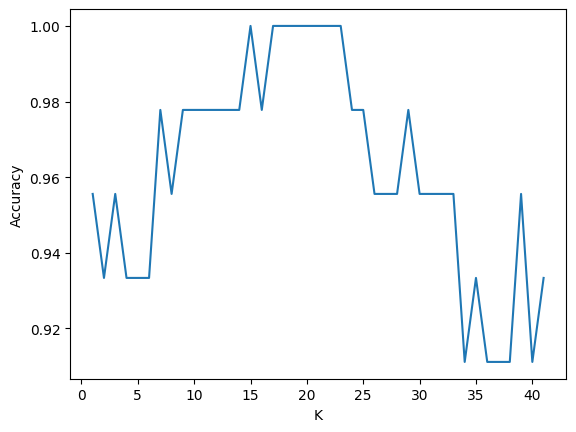

Best K 15
best accuracy 1.0


In [52]:
#Plot
plt.figure()
plt.plot(list(k_values),accs)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

best_k = list(k_values)[int(np.argmax(accs))]
print("Best K",best_k)
print("best accuracy",float(np.max(accs)))

## Compare distance metrics and voting weight